<a href="https://colab.research.google.com/github/lovemikassa/StatPrac/blob/main/dz5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [4]:
all_data.shape

(10000, 55)

## Train-test split

In [5]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [6]:
from sklearn.model_selection import train_test_split

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6075

In [8]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(solver='saga')

# init GridSearchCV with parameters
param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(feature_matrix, labels)

print(search.best_params_)

{'C': np.int64(1), 'penalty': 'l1'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.642

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`

Train the `KNeighborsClassifier` on the dataset.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


clf = KNeighborsClassifier()
clf.fit(train_feature_matrix, train_labels)

KNeighborsClassifier()

Let's select the parameters of our model:

Iterate over the grid from 1 to 10 for the number of neighbors parameter
Also, try using different metrics: ['manhattan', 'euclidean']
Try using different weight calculation strategies: [‘uniform’, ‘distance’]

In [10]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 11), 'metric': ['manhattan', 'euclidean'], 'weights': ['uniform', 'distance']}

clf_grid = GridSearchCV(clf, params, cv = 5, scoring = 'accuracy', n_jobs = -1)

clf_grid.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's output the best parameters

In [11]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [12]:
optimal_clf = clf_grid.best_estimator_

optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

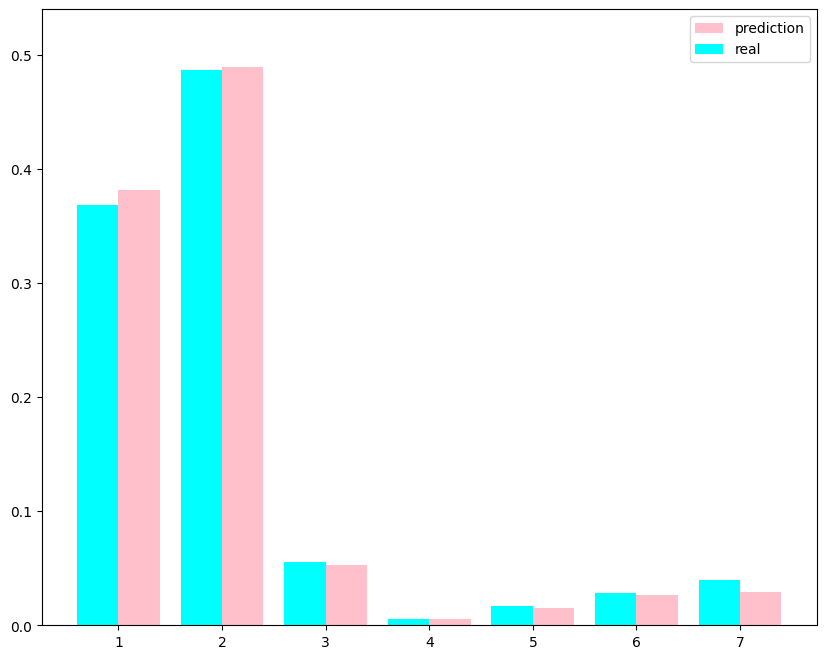

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts = True)
freq = list(map(lambda x: x / len(test_labels), freq))

pred_freq = pred_prob.mean(axis = 0)
plt.figure(figsize = (10, 8))
plt.bar(range(1, 8), pred_freq, width = 0.4, align = "edge", label = 'prediction', color = 'pink')
plt.bar(range(1, 8), freq, width = -0.4, align = "edge", label = 'real', color = 'cyan')
plt.ylim(0, 0.54)
plt.legend()
plt.show()


## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

In [14]:
y_pred = optimal_clf.predict(test_feature_matrix)


if (accuracy_score(test_labels, y_pred) > accuracy_score(labels, search.best_estimator_.predict(feature_matrix))):
    print("KNN is better")
else :
    print("Regression is better")
print ("Accuracy: ", accuracy_score(test_labels, y_pred))

KNN is better
Accuracy:  0.7845


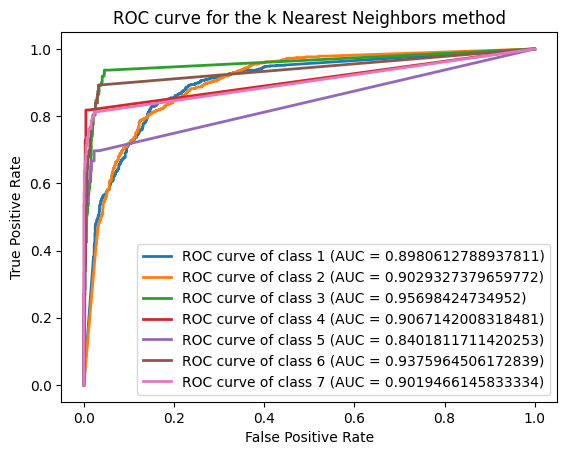

In [18]:
from sklearn.metrics import roc_curve, auc

fpr = []
tpr = []
roc_auc = []

for i in range(len(optimal_clf.classes_)):
    f, t, _ = roc_curve(test_labels, pred_prob[:, i], pos_label = i + 1)
    r = auc(f, t)
    fpr.append(f)
    tpr.append(t)
    roc_auc.append(r)

plt.figure()
for i in range(len(optimal_clf.classes_)):
    plt.plot(fpr[i], tpr[i], lw = 2, label = f'ROC curve of class {i+1} (AUC = {roc_auc[i]})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the k Nearest Neighbors method')
plt.legend()
plt.show()